### Tóm Tắt Bi-LSTM Train (**70%**) Test (**30%**)
---
* Data:  **2680** rows × **1** columns
* pochs: **10**
* Dùng **1 năm** ~ **365 ngày** để dự đoán giá của ngày tiếp theo
* Batch_size: **60**
---
###Kết Quả:
* MAPE: **6.55%**
* RMSE: **3038684**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('Data-Gold.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)
df_VND = df['VND'].values.reshape(-1, 1)

df

,VND
Date,
2012-01-02,32202288.50
2012-01-03,33607538.00
2012-01-04,33923003.00
2012-01-05,33628569.00
2012-01-06,34000652.75
...,...
2022-12-26,41586906.00
2022-12-27,41894838.00
2022-12-28,41727084.00


# Vẽ đồ thị

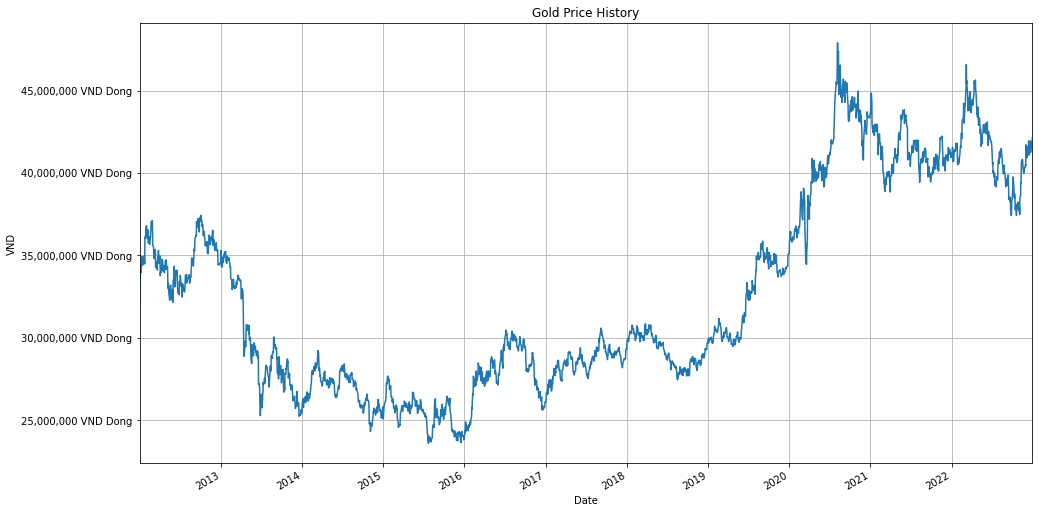

In [3]:
formatter = ticker.StrMethodFormatter('{x:,.0f} VND Dong')

title = 'Gold Price History'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

In [4]:
gold_price=df['VND']
values=gold_price.values
Train_len=math.ceil(len(values)*0.7)
Train_len

2009

### Trực chuẩn hoá dữ liệu

In [5]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(df)
scaled_data

array([[0.35425019],
       [0.4120421 ],
       [0.42501583],
       ...,
       [0.74596438],
       [0.75560409],
       [0.76288112]])

### Create Training & Testing Data

In [6]:
train_data=scaled_data[0:Train_len,:]

train_x=[]
train_y=[]

for i in range(365, len(train_data)):  # 1 years
  train_x.append(train_data[i-365:i,0])
  train_y.append(train_data[i,0])

train_x,train_y=np.array(train_x), np.array(train_y)

train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))


In [7]:
# Create the testing data
test_data=scaled_data[Train_len-365:,:]
test_x=[]
test_y=df[Train_len:]
for i in range (365, len(test_data)):
  test_x.append(test_data[i-365:i,0])
test_x=np.array(test_x)
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

### Xây dựng model

In [8]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True,input_shape=(train_x.shape[1],1))))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [9]:
# compile model
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
# fit model
m=model.fit(train_x, train_y,batch_size= 32, epochs=50)

Epoch 1/50
52/52 [==============================] - 90s 1s/step - loss: 0.0026 - acc: 6.0827e-04
Epoch 2/50
52/52 [==============================] - 73s 1s/step - loss: 3.6572e-04 - acc: 6.0827e-04
Epoch 3/50
52/52 [==============================] - 79s 2s/step - loss: 2.9995e-04 - acc: 6.0827e-04
Epoch 4/50
52/52 [==============================] - 73s 1s/step - loss: 2.5889e-04 - acc: 6.0827e-04
Epoch 5/50
52/52 [==============================] - 72s 1s/step - loss: 2.2525e-04 - acc: 6.0827e-04
Epoch 6/50
52/52 [==============================] - 72s 1s/step - loss: 2.1683e-04 - acc: 6.0827e-04
Epoch 7/50
52/52 [==============================] - 72s 1s/step - loss: 2.4455e-04 - acc: 6.0827e-04
Epoch 8/50
52/52 [==============================] - 72s 1s/step - loss: 1.8815e-04 - acc: 6.0827e-04
Epoch 9/50
52/52 [==============================] - 72s 1s/step - loss: 1.7429e-04 - acc: 6.0827e-04
Epoch 10/50
52/52 [==============================] - 72s 1s/step - loss: 1.9720e-04 - acc: 6.08

In [10]:
model.history.history.keys()

dict_keys(['loss', 'acc'])

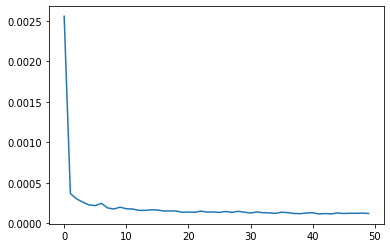

In [12]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [13]:
model.save("GoldPrice_bilstm_7_3.h5")

In [14]:
Predictions= model.predict(test_x)
Predictions=sc.inverse_transform(Predictions)

27/27 [==============================] - 15s 408ms/step


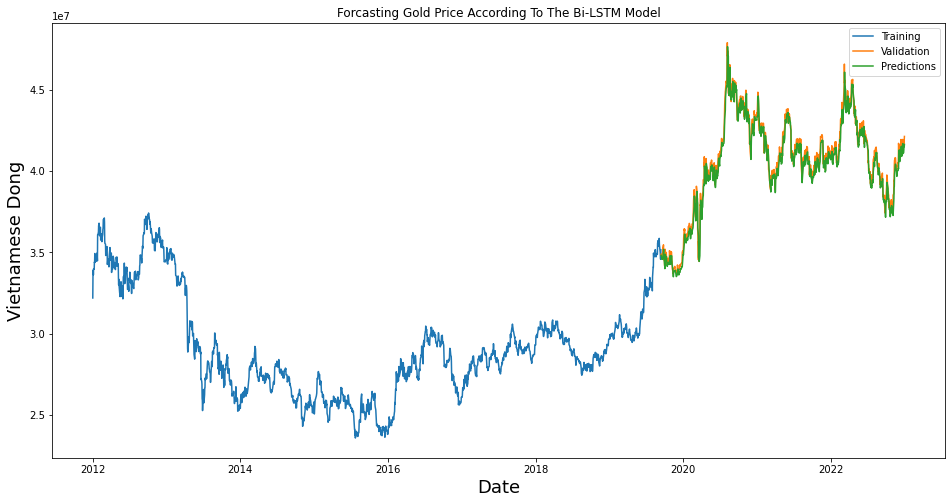

In [15]:
#plot data
train=df[:Train_len]
validation=df[Train_len:]
validation['Predictions']= Predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Forcasting Gold Price According To The Bi-LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Vietnamese Dong',fontsize=18)
plt.plot(train['VND'])
plt.plot(validation[['VND','Predictions']])
plt.legend(['Training','Validation','Predictions'])
plt.show()

In [16]:
validation

,VND,Predictions
Date,,
2019-09-13,34883189.85,34826468.0
2019-09-16,34763485.67,34744068.0
2019-09-17,34888522.25,34584016.0
2019-09-18,34898490.25,34631732.0
2019-09-19,34834247.27,34663760.0
...,...,...
2022-12-26,41586906.00,41125424.0
2022-12-27,41894838.00,41295080.0
2022-12-28,41727084.00,41596372.0


In [17]:
data=validation['VND']

In [18]:
data

Date
2019-09-13    34883189.85
2019-09-16    34763485.67
2019-09-17    34888522.25
2019-09-18    34898490.25
2019-09-19    34834247.27
                 ...     
2022-12-26    41586906.00
2022-12-27    41894838.00
2022-12-28    41727084.00
2022-12-29    41961480.00
2022-12-30    42138426.00
Name: VND, Length: 861, dtype: float64

In [19]:
mae = mean_absolute_error(data, Predictions)
mape = mean_absolute_percentage_error(data, Predictions)
mse = mean_squared_error(data, Predictions)
rmse = np.sqrt(mse)
r2 = r2_score(data, Predictions)
#print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
#print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.0f}")
#print("R2: ",r2)

MAPE: 0.96%
RMSE: 493253
